In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

**CHECKING IMAGES FOR CONFIRMATION**

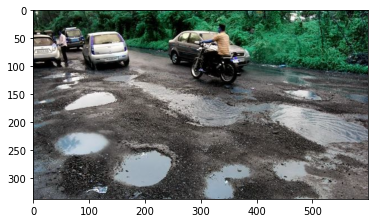

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Data/archive/potholes/10.jpg"))

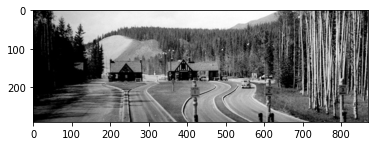

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Data/archive/normal/10.jpg"))

 Data Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, validation_split=0.2)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/archive', target_size = (64, 64),
                                                 batch_size = 32, class_mode = 'binary', subset="training")

Found 546 images belonging to 2 classes.


**Preprocessing the validation set**

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Data/archive", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu', input_shape=[64, 64, 3], padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu', padding='same'))
cnn.add(tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu', padding='same'))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Validation set**

In [ ]:
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
18/18 [==============================] - 23s 1s/step - loss: 0.6917 - accuracy: 0.5641 - val_loss: 0.6958 - val_accuracy: 0.5185
Epoch 2/25
18/18 [==============================] - 20s 1s/step - loss: 0.6738 - accuracy: 0.5696 - val_loss: 0.5836 - val_accuracy: 0.7185
Epoch 3/25
18/18 [==============================] - 18s 964ms/step - loss: 0.5186 - accuracy: 0.7473 - val_loss: 0.4663 - val_accuracy: 0.7926
Epoch 4/25
18/18 [==============================] - 18s 1s/step - loss: 0.5849 - accuracy: 0.8278 - val_loss: 0.7002 - val_accuracy: 0.6741
Epoch 5/25
18/18 [==============================] - 19s 1s/step - loss: 0.5168 - accuracy: 0.7747 - val_loss: 0.4768 - val_accuracy: 0.8074
Epoch 6/25
18/18 [==============================] - 18s 1s/step - loss: 0.3911 - accuracy: 0.8333 - val_loss: 0.4601 - val_accuracy: 0.7852
Epoch 7/25
18/18 [==============================] - 19s 1s/step - loss: 0.3570 - accuracy: 0.8498 - val_loss: 0.4301 - val_accuracy: 0.7852
Epoch 8/25
18/18 

In [ ]:
hist=cnn.history.history

Text(0, 0.5, 'loss')

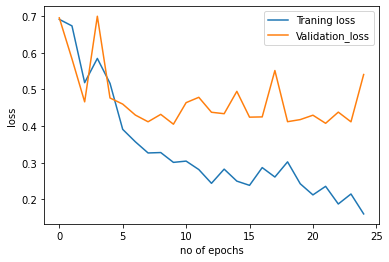

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'], label='Traning loss')
plt.plot(hist['val_loss'], label='Validation_loss')
plt.legend()
plt.xlabel('no of epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

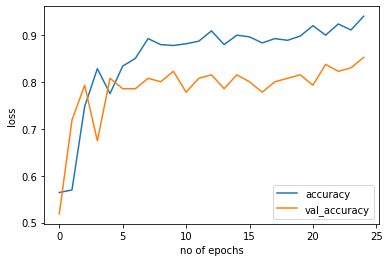

In [ ]:
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('no of epochs')
plt.ylabel('loss')

**Part 4 - Making a single prediction**

1/1 [==============================] - 0s 113ms/step


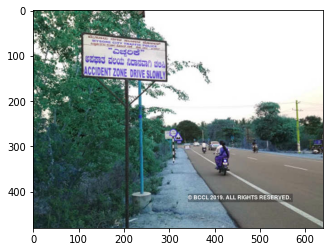

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array


test_image = load_img('/content/drive/MyDrive/Data/archive/normal/100.jpg', target_size = (64, 64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Data/archive/normal/100.jpg"))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'


normal


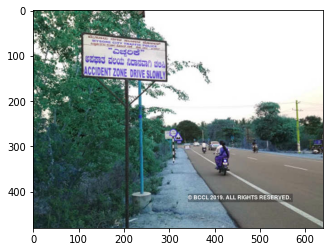

In [ ]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Data/archive/normal/100.jpg'))
print(prediction)